In [1]:
# 1. Data Exploration with Hadoop:


'''
--Hadoop Shell Commands

# List files in HDFS
hdfs dfs -ls /path/to/hdfs/directory

# Read data from a file in HDFS
hdfs dfs -cat /path/to/hdfs/file

# Copy a file from HDFS to the local filesystem
hdfs dfs -get /path/to/hdfs/file /local/path


--PySpark Code for Summary Statistics

from pyspark.sql import SparkSession
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("HDFS Data Exploration") \
    .getOrCreate()

# Load data from HDFS
hdfs_path = "hdfs://namenode:9000/path/to/hdfs/file.csv"
data = spark.read.csv(hdfs_path, header=True, inferSchema=True)

# Show data schema
data.printSchema()

# Show first few rows
data.show()

# Calculate summary statistics
data.describe().show()

# Stop SparkSession
spark.stop()


'''

'\n--Hadoop Shell Commands\n\n# List files in HDFS\nhdfs dfs -ls /path/to/hdfs/directory\n\n# Read data from a file in HDFS\nhdfs dfs -cat /path/to/hdfs/file\n\n# Copy a file from HDFS to the local filesystem\nhdfs dfs -get /path/to/hdfs/file /local/path\n\n\n--PySpark Code for Summary Statistics\n\nfrom pyspark.sql import SparkSession\n# Initialize SparkSession\nspark = SparkSession.builder     .appName("HDFS Data Exploration")     .getOrCreate()\n\n# Load data from HDFS\nhdfs_path = "hdfs://namenode:9000/path/to/hdfs/file.csv"\ndata = spark.read.csv(hdfs_path, header=True, inferSchema=True)\n\n# Show data schema\ndata.printSchema()\n\n# Show first few rows\ndata.show()\n\n# Calculate summary statistics\ndata.describe().show()\n\n# Stop SparkSession\nspark.stop()\n\n\n'

In [2]:
# 2. Word Count with Map Reduce:


'''
--Mapper Code (mapper.py)

#!/usr/bin/env python
import sys

# Read input line by line
for line in sys.stdin:
    # Remove leading and trailing whitespace
    line = line.strip()
    # Split line into words
    words = line.split()
    # Emit each word with a count of 1
    for word in words:
        print(f"{word}\t1")

--Reducer Code (reducer.py)

#!/usr/bin/env python
import sys

current_word = None
current_count = 0

# Read input line by line
for line in sys.stdin:
    # Parse input
    word, count = line.strip().split('\t')
    count = int(count)
    # If new word, print previous word's count and reset
    if current_word and word != current_word:
        print(f"{current_word}\t{current_count}")
        current_count = 0
    current_word = word
    current_count += count

# Output the last word
if current_word:
    print(f"{current_word}\t{current_count}")

--Run the Word Count on Hadoop

# Upload input file to HDFS
hdfs dfs -put /local/path/input.txt /path/to/hdfs/input

# Run Hadoop Streaming
hadoop jar /path/to/hadoop-streaming.jar \
    -input /path/to/hdfs/input \
    -output /path/to/hdfs/output \
    -mapper "python3 mapper.py" \
    -reducer "python3 reducer.py"

# View the results
hdfs dfs -cat /path/to/hdfs/output/part-*


'''

'\n--Mapper Code (mapper.py)\n\n#!/usr/bin/env python\nimport sys\n\n# Read input line by line\nfor line in sys.stdin:\n    # Remove leading and trailing whitespace\n    line = line.strip()\n    # Split line into words\n    words = line.split()\n    # Emit each word with a count of 1\n    for word in words:\n        print(f"{word}\t1")\n\n--Reducer Code (reducer.py)\n\n#!/usr/bin/env python\nimport sys\n\ncurrent_word = None\ncurrent_count = 0\n\n# Read input line by line\nfor line in sys.stdin:\n    # Parse input\n    word, count = line.strip().split(\'\t\')\n    count = int(count)\n    # If new word, print previous word\'s count and reset\n    if current_word and word != current_word:\n        print(f"{current_word}\t{current_count}")\n        current_count = 0\n    current_word = word\n    current_count += count\n\n# Output the last word\nif current_word:\n    print(f"{current_word}\t{current_count}")\n\n--Run the Word Count on Hadoop\n\n# Upload input file to HDFS\nhdfs dfs -put /l

In [3]:
#3. Data Analysis with Spark:


'''
from pyspark import SparkContext

# Initialize SparkContext
sc = SparkContext("local", "Data Analysis with RDDs")

# Load data into an RDD from HDFS
rdd = sc.textFile("hdfs://namenode:9000/path/to/hdfs/dataset.txt")

# Filter: Keep lines containing a specific keyword
filtered_rdd = rdd.filter(lambda line: "keyword" in line)

# Map: Transform lines into key-value pairs (word, 1)
mapped_rdd = rdd.flatMap(lambda line: line.split()) \
                .map(lambda word: (word, 1))

# ReduceByKey: Count occurrences of each word
word_counts = mapped_rdd.reduceByKey(lambda a, b: a + b)

# Sort: Sort the results by count in descending order
sorted_word_counts = word_counts.sortBy(lambda x: x[1], ascending=False)

# Collect and print results
for word, count in sorted_word_counts.collect():
    print(f"{word}: {count}")

# Stop SparkContext
sc.stop()


'''

'\nfrom pyspark import SparkContext\n\n# Initialize SparkContext\nsc = SparkContext("local", "Data Analysis with RDDs")\n\n# Load data into an RDD from HDFS\nrdd = sc.textFile("hdfs://namenode:9000/path/to/hdfs/dataset.txt")\n\n# Filter: Keep lines containing a specific keyword\nfiltered_rdd = rdd.filter(lambda line: "keyword" in line)\n\n# Map: Transform lines into key-value pairs (word, 1)\nmapped_rdd = rdd.flatMap(lambda line: line.split())                 .map(lambda word: (word, 1))\n\n# ReduceByKey: Count occurrences of each word\nword_counts = mapped_rdd.reduceByKey(lambda a, b: a + b)\n\n# Sort: Sort the results by count in descending order\nsorted_word_counts = word_counts.sortBy(lambda x: x[1], ascending=False)\n\n# Collect and print results\nfor word, count in sorted_word_counts.collect():\n    print(f"{word}: {count}")\n\n# Stop SparkContext\nsc.stop()\n\n\n'

In [4]:
#4. Streaming Analytics with Kafka and Spark


'''
--Kafka Producer (producer.py)

from kafka import KafkaProducer
import time
import random

# Initialize Kafka producer
producer = KafkaProducer(bootstrap_servers='localhost:9092')

# Generate and send random messages
while True:
    message = f"data-{random.randint(1, 100)}"
    producer.send('real-time-topic', value=message.encode('utf-8'))
    print(f"Produced: {message}")
    time.sleep(1)  # Adjust sleep for message frequency



--Spark Streaming Consumer (streaming_consumer.py)

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import split

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Kafka Spark Streaming") \
    .getOrCreate()

# Read data from Kafka topic
stream_df = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "real-time-topic") \
    .load()

# Extract message value and cast to string
value_df = stream_df.selectExpr("CAST(value AS STRING) as message")

# Perform transformation (e.g., word count)
transformed_df = value_df.withColumn("data", split(value_df["message"], "-")[1]) \
                         .groupBy("data").count()

# Write the result to the console in real time
query = transformed_df.writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

# Wait for the streaming query to finish
query.awaitTermination()



--Start Kafka

# Start Kafka Zookeeper and Broker
zookeeper-server-start.sh /path/to/zookeeper.properties
kafka-server-start.sh /path/to/server.properties

# Create Kafka topic
kafka-topics.sh --create --topic real-time-topic --bootstrap-server localhost:9092


'''

'\n--Kafka Producer (producer.py)\n\nfrom kafka import KafkaProducer\nimport time\nimport random\n\n# Initialize Kafka producer\nproducer = KafkaProducer(bootstrap_servers=\'localhost:9092\')\n\n# Generate and send random messages\nwhile True:\n    message = f"data-{random.randint(1, 100)}"\n    producer.send(\'real-time-topic\', value=message.encode(\'utf-8\'))\n    print(f"Produced: {message}")\n    time.sleep(1)  # Adjust sleep for message frequency\n\n\n\n--Spark Streaming Consumer (streaming_consumer.py)\n\nfrom pyspark.sql import SparkSession\nfrom pyspark.sql.types import StringType\nfrom pyspark.sql.functions import split\n\n# Initialize SparkSession\nspark = SparkSession.builder     .appName("Kafka Spark Streaming")     .getOrCreate()\n\n# Read data from Kafka topic\nstream_df = spark.readStream     .format("kafka")     .option("kafka.bootstrap.servers", "localhost:9092")     .option("subscribe", "real-time-topic")     .load()\n\n# Extract message value and cast to string\nval

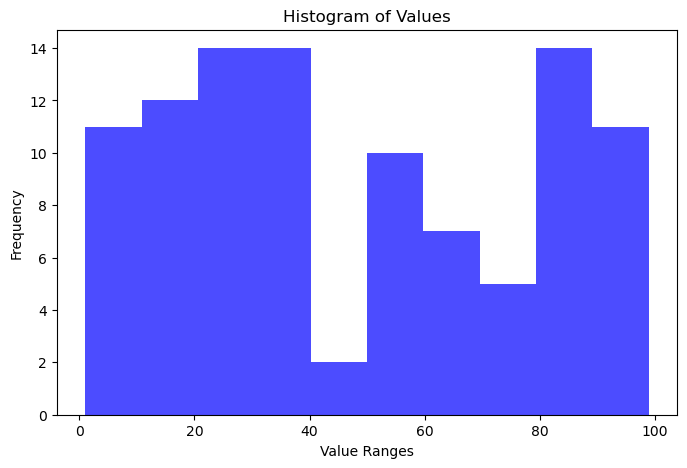

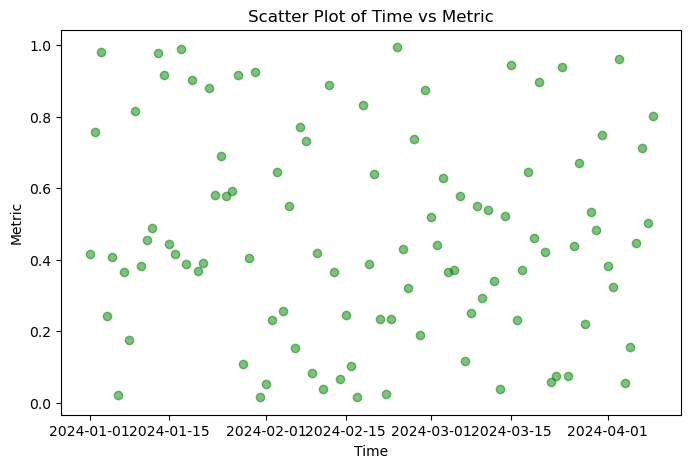

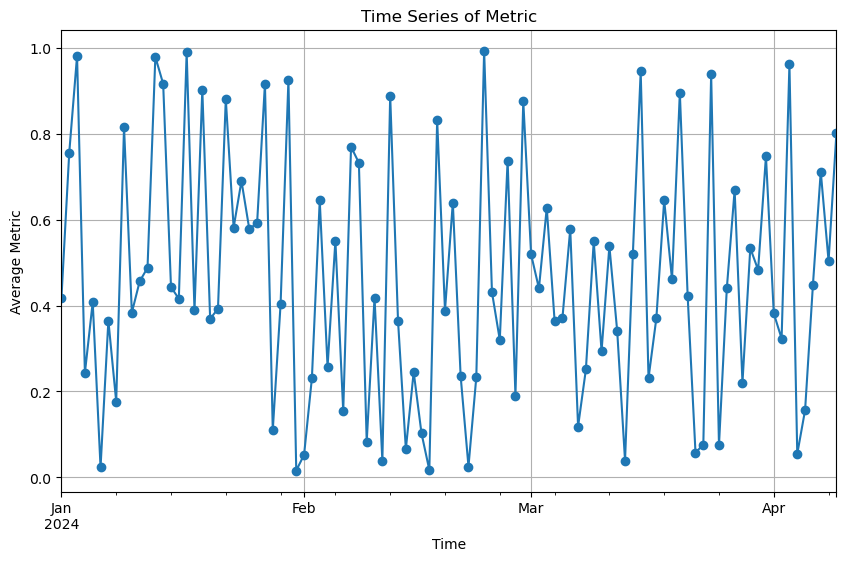

In [5]:
#5. Data Visualization with Python and Matplotlib:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample dataset
data = {
    "values": np.random.randint(1, 100, 100),
    "categories": np.random.choice(['A', 'B', 'C'], 100),
    "time": pd.date_range("2024-01-01", periods=100),
    "metric": np.random.rand(100)
}

# Create DataFrame
df = pd.DataFrame(data)

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['values'], bins=10, color='blue', alpha=0.7)
plt.title("Histogram of Values")
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['time'], df['metric'], color='green', alpha=0.5)
plt.title("Scatter Plot of Time vs Metric")
plt.xlabel("Time")
plt.ylabel("Metric")
plt.show()

# Time Series Line Plot
df.groupby('time')['metric'].mean().plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title("Time Series of Metric")
plt.xlabel("Time")
plt.ylabel("Average Metric")
plt.grid(True)
plt.show()


In [6]:
#6. Machine Learning Model Training with Spark MLlib


'''
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("MLlib Model Training") \
    .getOrCreate()

# Load dataset
data = spark.read.csv("hdfs://namenode:9000/path/to/dataset.csv", header=True, inferSchema=True)

# Assemble features into a single vector
feature_columns = [col for col in data.columns if col != "target"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data).select("features", "target")

# Split dataset into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Initialize a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="target")

# Create a parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define cross-validation
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=param_grid,
                          evaluator=RegressionEvaluator(labelCol="target", metricName="rmse"),
                          numFolds=3)

# Train the model using cross-validation
cv_model = crossval.fit(train_data)

# Evaluate the model on the test set
predictions = cv_model.bestModel.transform(test_data)
evaluator = RegressionEvaluator(labelCol="target", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

# Stop SparkSession
spark.stop()


'''

'\nfrom pyspark.sql import SparkSession\nfrom pyspark.ml.feature import VectorAssembler\nfrom pyspark.ml.regression import LinearRegression\nfrom pyspark.ml.evaluation import RegressionEvaluator\nfrom pyspark.ml.tuning import CrossValidator, ParamGridBuilder\n\n# Initialize SparkSession\nspark = SparkSession.builder     .appName("MLlib Model Training")     .getOrCreate()\n\n# Load dataset\ndata = spark.read.csv("hdfs://namenode:9000/path/to/dataset.csv", header=True, inferSchema=True)\n\n# Assemble features into a single vector\nfeature_columns = [col for col in data.columns if col != "target"]\nassembler = VectorAssembler(inputCols=feature_columns, outputCol="features")\ndata = assembler.transform(data).select("features", "target")\n\n# Split dataset into training and test sets\ntrain_data, test_data = data.randomSplit([0.8, 0.2], seed=42)\n\n# Initialize a Linear Regression model\nlr = LinearRegression(featuresCol="features", labelCol="target")\n\n# Create a parameter grid for hyperp

In [7]:
#7. Graph Analytics with GraphX:


'''
import org.apache.spark.graphx._
import org.apache.spark.rdd.RDD
import org.apache.spark.sql.SparkSession

// Initialize SparkSession
val spark = SparkSession.builder
  .appName("Graph Analytics with GraphX")
  .getOrCreate()
val sc = spark.sparkContext

// Create an RDD for vertices (id, name)
val vertices: RDD[(VertexId, String)] = sc.parallelize(Seq(
  (1L, "Alice"), (2L, "Bob"), (3L, "Charlie"),
  (4L, "David"), (5L, "Eve")
))

// Create an RDD for edges (sourceId, destinationId, relationship)
val edges: RDD[Edge[String]] = sc.parallelize(Seq(
  Edge(1L, 2L, "friend"), Edge(2L, 3L, "follow"),
  Edge(3L, 4L, "friend"), Edge(4L, 5L, "follow"),
  Edge(5L, 1L, "friend")
))

// Create the graph
val graph = Graph(vertices, edges)

// Compute PageRank
val ranks = graph.pageRank(0.01).vertices
println("PageRank:")
ranks.collect.foreach { case (id, rank) =>
  println(s"Vertex $id has rank $rank")
}

// Compute connected components
val components = graph.connectedComponents().vertices
println("Connected Components:")
components.collect.foreach { case (id, component) =>
  println(s"Vertex $id is in component $component")
}

// Detect communities using triangle count
val triangleCounts = graph.triangleCount().vertices
println("Triangle Counts:")
triangleCounts.collect.foreach { case (id, count) =>
  println(s"Vertex $id is part of $count triangles")
}

// Stop SparkSession
spark.stop()


'''

'\nimport org.apache.spark.graphx._\nimport org.apache.spark.rdd.RDD\nimport org.apache.spark.sql.SparkSession\n\n// Initialize SparkSession\nval spark = SparkSession.builder\n  .appName("Graph Analytics with GraphX")\n  .getOrCreate()\nval sc = spark.sparkContext\n\n// Create an RDD for vertices (id, name)\nval vertices: RDD[(VertexId, String)] = sc.parallelize(Seq(\n  (1L, "Alice"), (2L, "Bob"), (3L, "Charlie"),\n  (4L, "David"), (5L, "Eve")\n))\n\n// Create an RDD for edges (sourceId, destinationId, relationship)\nval edges: RDD[Edge[String]] = sc.parallelize(Seq(\n  Edge(1L, 2L, "friend"), Edge(2L, 3L, "follow"),\n  Edge(3L, 4L, "friend"), Edge(4L, 5L, "follow"),\n  Edge(5L, 1L, "friend")\n))\n\n// Create the graph\nval graph = Graph(vertices, edges)\n\n// Compute PageRank\nval ranks = graph.pageRank(0.01).vertices\nprintln("PageRank:")\nranks.collect.foreach { case (id, rank) =>\n  println(s"Vertex $id has rank $rank")\n}\n\n// Compute connected components\nval components = graph.

In [8]:
#8. SQL Queries with Hive: 


'''
1. Hive SQL Script for Data Analysis

-- Create a database
CREATE DATABASE IF NOT EXISTS my_database;

-- Use the created database
USE my_database;

-- Create a table
CREATE TABLE IF NOT EXISTS employees (
    id INT,
    name STRING,
    department STRING,
    salary FLOAT,
    hire_date STRING
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

-- Load data into the table from HDFS
LOAD DATA INPATH '/path/to/hdfs/employees.csv' INTO TABLE employees;

-- Query 1: Filter employees with salary greater than 50000
SELECT * FROM employees WHERE salary > 50000;

-- Query 2: Aggregate average salary by department
SELECT department, AVG(salary) AS avg_salary
FROM employees
GROUP BY department;

-- Query 3: Join employees with another table (departments)
CREATE TABLE IF NOT EXISTS departments (
    department STRING,
    manager STRING
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE;

LOAD DATA INPATH '/path/to/hdfs/departments.csv' INTO TABLE departments;

SELECT e.name, e.department, d.manager
FROM employees e
JOIN departments d
ON e.department = d.department;

-- Query 4: Count employees in each department
SELECT department, COUNT(*) AS employee_count
FROM employees
GROUP BY department;



2. Save the script as a .hql file and execute it in Hive using:

hive -f script.hql

'''

"\n1. Hive SQL Script for Data Analysis\n\n-- Create a database\nCREATE DATABASE IF NOT EXISTS my_database;\n\n-- Use the created database\nUSE my_database;\n\n-- Create a table\nCREATE TABLE IF NOT EXISTS employees (\n    id INT,\n    name STRING,\n    department STRING,\n    salary FLOAT,\n    hire_date STRING\n)\nROW FORMAT DELIMITED\nFIELDS TERMINATED BY ','\nSTORED AS TEXTFILE;\n\n-- Load data into the table from HDFS\nLOAD DATA INPATH '/path/to/hdfs/employees.csv' INTO TABLE employees;\n\n-- Query 1: Filter employees with salary greater than 50000\nSELECT * FROM employees WHERE salary > 50000;\n\n-- Query 2: Aggregate average salary by department\nSELECT department, AVG(salary) AS avg_salary\nFROM employees\nGROUP BY department;\n\n-- Query 3: Join employees with another table (departments)\nCREATE TABLE IF NOT EXISTS departments (\n    department STRING,\n    manager STRING\n)\nROW FORMAT DELIMITED\nFIELDS TERMINATED BY ','\nSTORED AS TEXTFILE;\n\nLOAD DATA INPATH '/path/to/hdfs

In [9]:
# 9. Data Sampling and Stratification:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create a sample dataset
data = {
    'id': range(1, 101),
    'age': np.random.randint(18, 60, size=100),
    'income': np.random.randint(30000, 100000, size=100),
    'class': np.random.choice(['A', 'B'], size=100, p=[0.7, 0.3])  # Imbalanced class distribution
}

df = pd.DataFrame(data)

# Simple random sampling (e.g., 20% of the data)
random_sample = df.sample(frac=0.2, random_state=42)

# Stratified sampling based on the 'class' column
stratified_sample, _ = train_test_split(
    df,
    test_size=0.8,  # Keep 20% as a stratified sample
    stratify=df['class'],  # Stratify by 'class' column
    random_state=42
)

# Show samples
print("Random Sample:")
print(random_sample.head())

print("\nStratified Sample:")
print(stratified_sample.head())

# Save samples to CSV
random_sample.to_csv("random_sample.csv", index=False)
stratified_sample.to_csv("stratified_sample.csv", index=False)


Random Sample:
    id  age  income class
83  84   53   37919     A
53  54   48   48034     A
70  71   31   90354     A
45  46   18   49931     A
44  45   54   91194     B

Stratified Sample:
    id  age  income class
36  37   29   69294     A
42  43   30   59726     A
53  54   48   48034     A
25  26   36   77501     A
37  38   38   52704     B


In [10]:
# 10. Data Cleaning and Preprocessing with Pandas: 

import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [25, np.nan, 35, 40, 50, np.nan, 60, 70, 80, 90],
    'salary': [50000, 60000, 70000, np.nan, 100000, 110000, 120000, 130000, 140000, 150000],
    'category': ['A', 'B', 'A', 'C', 'B', 'A', np.nan, 'C', 'B', 'C'],
    'score': [80, 85, 90, 95, 100, 110, 120, 130, 140, 150]
}

df = pd.DataFrame(data)

# Handle missing values
# Fill missing numerical values with the column median
df['age'].fillna(df['age'].median(), inplace=True)
df['salary'].fillna(df['salary'].median(), inplace=True)

# Fill missing categorical values with the mode (most frequent value)
df['category'].fillna(df['category'].mode()[0], inplace=True)

# Handle outliers using the IQR method for 'age' and 'salary'
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
df = df[(df['age'] >= (Q1_age - 1.5 * IQR_age)) & (df['age'] <= (Q3_age + 1.5 * IQR_age))]

Q1_salary = df['salary'].quantile(0.25)
Q3_salary = df['salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
df = df[(df['salary'] >= (Q1_salary - 1.5 * IQR_salary)) & (df['salary'] <= (Q3_salary + 1.5 * IQR_salary))]

# Standardize text data in 'category' column (e.g., lowercase and strip spaces)
df['category'] = df['category'].str.lower().str.strip()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Normalize numerical columns (e.g., 'age' and 'salary')
df[['age', 'salary']] = (df[['age', 'salary']] - df[['age', 'salary']].mean()) / df[['age', 'salary']].std()

# Show cleaned dataset
print(df)

# Save cleaned dataset
df.to_csv("cleaned_sample_dataset.csv", index=False)

   id       age    salary category  score
0   1 -1.541460 -1.585495        a     80
1   2 -0.049725 -1.291884        b     85
2   3 -1.044215 -0.998274        a     90
3   4 -0.795592  0.176166        c     95
4   5 -0.298347 -0.117444        b    100
5   6 -0.049725  0.176166        a    110
6   7  0.198898  0.469776        a    120
7   8  0.696143  0.763386        c    130
8   9  1.193388  1.056996        b    140
9  10  1.690634  1.350607        c    150
